In [1]:
from os import listdir; from IPython.display import display, HTML; from os.path import isfile, join
import pandas as pd, numpy as np, seaborn as sns, json, csv, os, ast, xml.etree.ElementTree
%matplotlib inline
import json
from matplotlib.backends.backend_pdf import PdfPages
sns.set_style('whitegrid')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
from collections import Counter

In [36]:
# Clean File
#clean_file = open("../../Results/logs/Pilot2/clean_dump.json", "w")

with open('../../Results/logs/Pilot2/dump.jl') as f:
    for line in f:
        count = 0
        j_content = json.loads(line)
        content = j_content['content']
        for i in content.items():
            if(i[1] == 'change_tab'):
                display("DIO CANAGLIA")
        #display(content)
        #content = json.loads(str(j_content['content']))
        #change = content['browser_event']
        #timestamp = j_content['browser_time'].split('-')
        #if(timestamp[1] == '08' & change == 'change_tab'):
        #    count = count + 1
    display('Done!')

'Done!'

0

In [2]:
gold_dict = ['HIGH', 'LOW']

In [3]:
df = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')
df = df[['unit_id', 'doc_id', 'rel', 'worker_id', 'S100_rel', 'off_page_count']]
df = df.sort_values(by = ['S100_rel'], ascending=False)
df = df[df["rel"].isin(gold_dict) == False]
#df = df.replace('LOW', 1).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 6)

df.head()

,unit_id,doc_id,rel,worker_id,S100_rel,off_page_count
1596,unit_199,REP_MOSTLYTRUE_doc7,MOSTLYTRUE,A3O26FE6GMR3XS,100.0,1
528,unit_66,REP_HALFTRUE_doc3,HALFTRUE,A3VTUDQ3SKMUDW,100.0,2
1378,unit_172,DEM_BARELYTRUE_doc10,BARELYTRUE,A2046TO5K7O4F2,100.0,3
1377,unit_172,DEM_MOSTLYTRUE_doc6,MOSTLYTRUE,A2046TO5K7O4F2,100.0,2
1373,unit_172,REP_FALSE_doc4,FALSE,A2046TO5K7O4F2,100.0,0


,unit_id,doc_id,rel,worker_id,S100_rel,off_page_count
1596,unit_199,REP_MOSTLYTRUE_doc7,4,A3O26FE6GMR3XS,100.0,1
528,unit_66,REP_HALFTRUE_doc3,3,A3VTUDQ3SKMUDW,100.0,2
1378,unit_172,DEM_BARELYTRUE_doc10,2,A2046TO5K7O4F2,100.0,3
1377,unit_172,DEM_MOSTLYTRUE_doc6,4,A2046TO5K7O4F2,100.0,2
1373,unit_172,REP_FALSE_doc4,1,A2046TO5K7O4F2,100.0,0


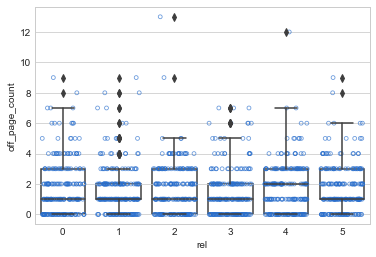

In [4]:
dff = df.replace('LIE', 0).replace('FALSE', 1).replace('BARELYTRUE', 2).replace('HALFTRUE', 3).replace('MOSTLYTRUE', 4).replace('TRUE', 5)
display(dff.head())

name = "../../plots/Pilot2/Others/off_page_S100.pdf"
pages = PdfPages(name)

m = {"s": 15, "alpha": .7, 'linewidths': .8, "facecolor": 'none', 'edgecolor': '#2A6FCD'}

ax = sns.regplot(x = 'rel', y = 'off_page_count', data = dff, fit_reg = False, 
                 x_jitter = .38, scatter_kws = m)
sns.boxplot( x = 'rel', y = 'off_page_count', data = dff, boxprops = dict(facecolor = '#FFFFFF', alpha=1, zorder = 0) )

pages.savefig(bbox_inches='tight');pages.close()

In [39]:
#display(df['judgments'].corr(df['expert']))

#NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
# Normalizzo il valore nel range [0, 6]
df = df.replace('LOW', 1).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 6)
df['judgments'] = df.apply(lambda row: (((row.judgments - 0) * (6 - 1)) / (100 - 0)) + 1, axis = 1)
df['judg_diff'] = df.apply(lambda row: abs(row.expert - row.judgments), axis = 1)
df = df.sort_values(by = ['judgments'], ascending=False)
df.head()

,unit_id,doc,expert,worker_id,judgments,off_page_count,judg_diff
0,unit_0,REP_LIE_doc3,1,A3KU7DD8Q1NQ7P,6.0,0,5.0
116,unit_14,DEM_TRUE_doc3,6,ARWN6TT8EWCFJ,6.0,1,0.0
25,unit_3,REP_FALSE_doc2,2,A17U82YPDOT3CW,6.0,4,4.0
174,unit_21,REP_TRUE_doc2,6,A275V9CR5L5ET2,6.0,0,0.0
21,unit_2,DEM_HALFTRUE_doc2,4,A2VURQMBDXLUCC,6.0,3,2.0


In [40]:
df = pd.read_csv('../../Task/Pilot2/Parsed-results.csv')
df = df[df["expert"].isin(gold_dict) == False]
df = df[['doc','off_page_count']]
df = df.groupby('doc').sum()
df

,off_page_count
doc,
DEM_BARELYTRUE_doc1,4
DEM_BARELYTRUE_doc2,4
DEM_BARELYTRUE_doc3,5
DEM_FALSE_doc1,6
DEM_FALSE_doc2,7
DEM_FALSE_doc3,8
DEM_HALFTRUE_doc1,11
DEM_HALFTRUE_doc2,7
DEM_HALFTRUE_doc3,5


<h3>S6</h3>

In [51]:
df = pd.read_csv('../../Task/Pilot2/Parsed-results_S6.csv')
df = df[['unit_id', 'doc', 'expert', 'worker_id', 'judgments', 'off_page_count']]
df = df.sort_values(by = ['judgments'], ascending=False)
df = df[df["expert"].isin(gold_dict) == False]
#df = df.replace('LOW', 1).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 6)

df.head()

,unit_id,doc,expert,worker_id,judgments,off_page_count
191,unit_23,DEM_MOSTLYTRUE_doc2,MOSTLYTRUE,A2ZQCHONMAJZF,6,8
28,unit_3,DEM_MOSTLYTRUE_doc3,MOSTLYTRUE,AH31QLJ57XC8W,6,1
108,unit_13,DEM_TRUE_doc3,TRUE,A1IEAOCJNSPVRX,6,2
39,unit_4,REP_BARELYTRUE_doc1,BARELYTRUE,A2P3KHF8NIJS68,6,2
44,unit_5,DEM_HALFTRUE_doc1,HALFTRUE,A3SH7B3UK915FC,6,2


,unit_id,doc,expert,worker_id,judgments,off_page_count
191,unit_23,DEM_MOSTLYTRUE_doc2,4,A2ZQCHONMAJZF,6,8
28,unit_3,DEM_MOSTLYTRUE_doc3,4,AH31QLJ57XC8W,6,1
108,unit_13,DEM_TRUE_doc3,5,A1IEAOCJNSPVRX,6,2
39,unit_4,REP_BARELYTRUE_doc1,2,A2P3KHF8NIJS68,6,2
44,unit_5,DEM_HALFTRUE_doc1,3,A3SH7B3UK915FC,6,2


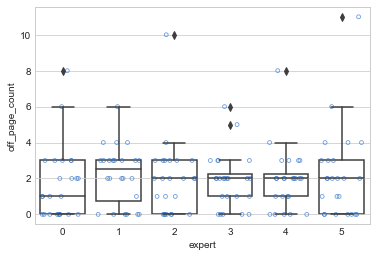

In [52]:
dff = df.replace('LIE', 0).replace('FALSE', 1).replace('BARELYTRUE', 2).replace('HALFTRUE', 3).replace('MOSTLYTRUE', 4).replace('TRUE', 5)
display(dff.head())

name = "../../plots/Pilot2/Others/off_page_S6.pdf"
pages = PdfPages(name)

m = {"s": 15, "alpha": .7, 'linewidths': .8, "facecolor": 'none', 'edgecolor': '#2A6FCD'}

ax = sns.regplot(x = 'expert', y = 'off_page_count', data = dff, fit_reg = False, 
                 x_jitter = .38, scatter_kws = m)
sns.boxplot( x = 'expert', y = 'off_page_count', data = dff, boxprops = dict(facecolor = '#FFFFFF', alpha=1, zorder = 0) )

pages.savefig(bbox_inches='tight');pages.close()